# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd 
from scipy import stats

C:\Users\giusa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv('data/Employee.csv')
employee 

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [3]:
employee = pd.DataFrame(employee)

#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
# Method 1
# your answer here
emp_group = employee.groupby(['Department']).agg({'Salary':'mean'})
emp_group

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [5]:
# Method 2
# your answer here
employee_pivot=employee.pivot_table(index= 'Department', values='Salary')

In [6]:
employee_pivot

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
# your answer here
employee_pivot2=employee.pivot_table(index= ['Department', 'Title'], values='Salary')
employee_pivot2

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
# your answer here
employee_pivot3=employee.pivot_table(index= ['Years', 'Title'], values='Salary')
employee_pivot3

Salary
Years Title            
1     analyst        35
2     analyst        30
      associate      55
3     associate      55
4     analyst        35
7     associate      60
8     VP             70

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [9]:
# your answer here
employee_pivot4=employee.pivot_table(index= ['Department', 'Title'], aggfunc= {'Salary':'mean', 'Name':'count'})
employee_pivot4

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [56]:
# your answer here
employee_pivot5=employee.pivot_table(index= ['Department', 'Title'], aggfunc= {'Salary':['median', 'max', 'min', 'std']})
employee_pivot5

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

In [ ]:
# We do not have std on VP and associate because there's no difference in the salary by sector for these positions. 

#### Based on your comments, fill the missing values with an appropriate value.

In [57]:
# your answer here
employee_pivot5['Salary',    'std'] = employee_pivot5['Salary',    'std'].fillna(0)
employee_pivot5

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [58]:
# your answer here
employee_pivot6=employee.pivot_table(index= ['Department'], aggfunc= {'Salary':'sum', 'Name': 'count'})
employee_pivot6

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [13]:
# your answer here
employee_pivot7=employee.pivot_table(index= ['Department', 'Title'], aggfunc= {'Years':'sum', 'Salary':'mean'})
employee_pivot7

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [14]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [15]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [16]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [17]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
# your answer here
('Pearson correlation:', stats.pearsonr(fitbit['Minutes Very Active'], fitbit['Steps']))

('Pearson correlation:', (0.5714518481062598, 3.3572824994545226e-33))

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

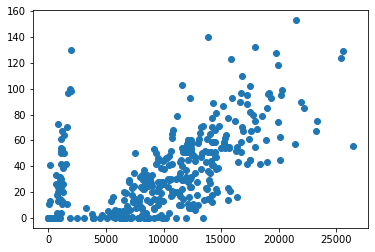

In [19]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.show()



#### What can you say about Minute Very Active and Steps? Write a comment below

In [20]:

# We can observe that we have a concentration of steps from 0 to 80min of minutes very active. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:

('Pearson correlation:', stats.pearsonr(fitbit['Minutes Sedentary'], fitbit['Steps']))

('Pearson correlation:', (0.07690608062990095, 0.14143690593737201))

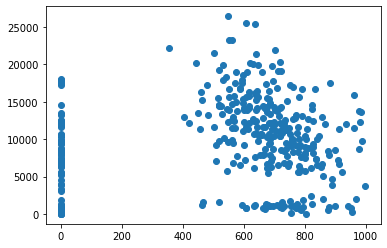

In [22]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.show()


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [23]:

#given the correlation and the plot, these two variables seem to be distant from a perfect linear relationship.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:

('Pearson correlation:', stats.pearsonr(fitbit['MinutesOfSleep'], fitbit['Steps']))

('Pearson correlation:', (0.13098565950836386, 0.012018728392520099))

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

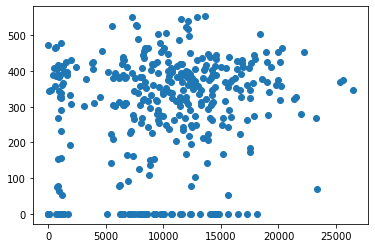

In [25]:

plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])
plt.show()


# Minutes of Sleep dont seem to have a great impact on number of steps 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [38]:
# your answer here
subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
subset

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [40]:
cor_fit = subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [41]:
# your answer here
cor_fit.sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


In [ ]:
# The highly correlated features with variable Steps are: Minutes Very Active and Floors.

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [28]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


In [29]:
import seaborn as sns

In [30]:
time_grades.rename(columns={"Study time": "study_time"}, inplace=True)

#### Show visually the frequency distribution of the time_grades dataset.

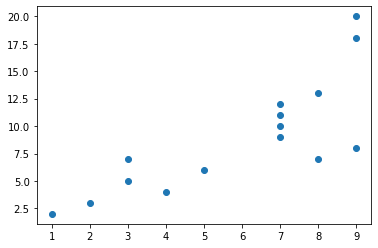

In [31]:
plt.scatter(time_grades.Grade, time_grades.study_time)
plt.show() 

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [48]:
# your answer here
print('Pearson correlation:', stats.pearsonr(time_grades['Grade'], time_grades['study_time']))

Pearson correlation: (0.7980456073578858, 0.0003627635256342731)


In [33]:
display(time_grades['Grade'].sort_values(ascending=False))
display(time_grades['study_time'].sort_values(ascending=False))

2     9
4     9
8     9
10    8
13    8
1     7
3     7
6     7
11    7
7     5
0     4
5     3
9     3
14    2
12    1
Name: Grade, dtype: int64

4     20
8     18
13    13
6     12
11    11
3     10
1      9
2      8
9      7
10     7
7      6
5      5
0      4
14     3
12     2
Name: study_time, dtype: int64

In [49]:
print('Spearman correlation:', stats.spearmanr(time_grades['Grade'], time_grades['study_time']))

Spearman correlation: SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


In [ ]:
# From the results, it seems to be a correlation, the more time spent studying, higher the grade.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

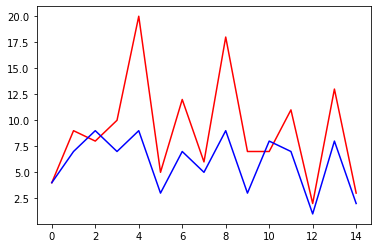

In [44]:
# your answer here
time_grades.study_time.plot(c='r')
time_grades.Grade.plot(c='b')
plt.show()

In [ ]:
# It shows that the grades goes up when the study time is higher, and also the opposite.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [36]:
#Pearson correlation looks for a linear relationship between two variables. It will correlate the variables in the same position,
# and will provide the direction of the linear relationship:
#+1 INDICATES A PERFECT LINEAR CORRELATION
#-1 INDICATES A PERCECT LINEAR ANTI-CORRELATION


# The Spearman correlation does not look for linear relationship, but monotonic relationship.
# It works by ranking the variables and comparing the rank of the points.
